In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [35]:
def plot(df):
    # Now create plots with the proper column structure
    plt.figure(figsize=(15, 30))
    
    # Plot 1: Time vs Angle
    plt.subplot(3, 1, 1)
    plt.scatter(df['time'], df['angle'], marker='o', linestyle='-', color='blue')
    plt.title('Time vs Angle Pendulum')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)
    
    # Plot 2: Time vs Position
    plt.subplot(3, 1, 2)
    plt.plot(df['time'], df['position'], marker='s', linestyle='-', color='red')
    plt.title('Time vs Position Motor')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.grid(True)
    
    # Plot 3: Time vs Voltage
    plt.subplot(3, 1, 3)
    plt.plot(df['time'], df['voltage'], marker='^', linestyle='-', color='green')
    plt.title('Time vs Voltage')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
def plot_p_d(df):
    # Now create plots with the proper column structure
    plt.figure(figsize=(15, 30))
    
    # Plot 1: Time vs Angle
    """plt.subplot(5, 1, 1)
    plt.scatter(df['time'], df['angle'], marker='o', linestyle='-', color='blue')
    plt.title('Time vs Angle Pendulum')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)
    
    plt.subplot(5, 1, 2)
    plt.scatter(df['time'], df['pendulum_angle'], marker='o', linestyle='-', color='blue')
    plt.title('Time vs Angle Pendulum')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)"""
    
    plt.subplot(3, 1, 1)
    plt.scatter(df['time'], df['unwrapped_pendulum_angle'], marker='o', linestyle='-', color='blue')
    plt.title('Time vs Angle Pendulum')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)
    
    # Plot 2: Time vs Position
    plt.subplot(3, 1, 2)
    plt.plot(df['time'], df['position'], marker='s', linestyle='-', color='red')
    plt.title('Time vs Position Motor')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.grid(True)
    
    # Plot 3: Time vs Voltage
    plt.subplot(3, 1, 3)
    plt.plot(df['time'], df['voltage'], marker='^', linestyle='-', color='green')
    plt.title('Time vs Voltage')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_new(df):
    plt.figure(figsize=(15, 30))

    # Plot 1: Time vs Pendulum Angle (from upright)
    plt.subplot(3, 1, 1)
    plt.scatter(df['Time(s)'], df['Pendulum_Angle_From_Upright(deg)'], marker='o', linestyle='-', color='blue')
    plt.title('Time vs Pendulum Angle From Upright')
    plt.xlabel('Time(s)')
    plt.ylabel('Angle (deg)')
    plt.grid(True)

    # Plot 2: Time vs Motor Angle
    plt.subplot(3, 1, 2)
    plt.plot(df['Time(s)'], df['Motor_Angle(deg)'], marker='s', linestyle='-', color='red')
    plt.title('Time vs Motor Angle')
    plt.xlabel('Time(s)')
    plt.ylabel('Angle (deg)')
    plt.grid(True)

    # Plot 3: Time vs Motor Voltage
    plt.subplot(3, 1, 3)
    plt.plot(df['Time(s)'], df['Motor_Voltage(V)'], marker='^', linestyle='-', color='green')
    plt.title('Time vs Motor Voltage')
    plt.xlabel('Time(s)')
    plt.ylabel('Voltage (V)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
def read_new_data(filename):
    """
    Reads the new data file (Excel or CSV) that already has a proper structure.
    Adjust the reading function if your file is CSV with whitespace delimiters.
    """
    try:
        if filename.endswith('.xlsx'):
            df = pd.read_excel(filename)
        elif filename.endswith('.csv'):
            # If columns are separated by whitespace instead of commas:
            df = pd.read_csv(filename, delim_whitespace=True)
        else:
            raise ValueError("Unsupported file type.")
        print(f"Successfully processed {filename}")
        return df
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None

def process_excel_csv(filename):
    try:
        # Read the Excel file
        excel_file = pd.ExcelFile(filename)
        df_raw = excel_file.parse(sheet_name=0)
        
        # Extract the column name to get the header
        header = df_raw.columns[0]
        column_names = header.split(',')
        
        # Create a new DataFrame by splitting the values in each row
        data_rows = []
        for _, row in df_raw.iterrows():
            # Split the string by commas and convert to appropriate types
            values = row[0].split(',')
            data_rows.append(values)
        
        # Create the properly structured DataFrame
        df = pd.DataFrame(data_rows, columns=column_names)
        
        # Convert columns to numeric (this will handle strings with decimal points)
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='ignore')
            
        print(f"Successfully processed {filename}")
        return df
    
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None
def convert_angle_to_original(transformed_angle):
    if transformed_angle > 0:
        original_angle = transformed_angle + 180
    else:
        original_angle = transformed_angle - 180
        
    # Ensure angle stays in the range [-180, 180]
    if original_angle > 180:
        original_angle -= 360
    elif original_angle <= -180:
        original_angle += 360
        
    return original_angle

# Function to process data and add the original angle column
def process_pendulum_data(df):
    # Make a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Convert the angle column back to the original reading
    processed_df['pendulum_angle'] = processed_df['angle'].apply(convert_angle_to_original)
    
    return processed_df

# Example usage
def process_all_dataframes(df_dict):
    result_dict = {}
    for name, df in df_dict.items():
        result_dict[name] = process_pendulum_data(df)
        print(f"Processed {name}: Added original_angle column")
    return result_dict

def process_and_save_angles(df, filename="processed_angles.csv"):
    # Make a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Make sure original_angle is calculated
    if 'pendulum_angle' not in processed_df.columns:
        # Calculate original angle
        processed_df['pendulum_angle'] = processed_df['angle'].apply(convert_angle_to_original)
    
    # Create an unwrapped version of the angle to avoid discontinuities
    # Convert to radians, unwrap, then convert back to degrees
    angle_rad = np.radians(processed_df['pendulum_angle'])
    unwrapped_angle_rad = np.unwrap(angle_rad)
    processed_df['unwrapped_pendulum_angle'] = np.degrees(unwrapped_angle_rad)
    
    # Keep only the columns we want, including voltage
    result_df = processed_df[['time', 'angle', 'position', 'pendulum_angle', 'unwrapped_pendulum_angle', 'voltage']]
    
    # Save to CSV
    result_df.to_csv(filename, index=False)
    print(f"Saved processed angles and voltage to {filename}")
    
    return result_df



In [36]:
# Process data1.xlsx through data6.xlsx
df_dict = {}  # Dictionary to hold all dataframes
missing_files = []  # List to track missing files

    
# Process each file
for i in range(1, 7):
    filename = f'data{i}.xlsx'
    
    if os.path.exists(filename):
        # Create the dataframe and add it to our dictionary
        df = process_excel_csv(filename)
        if df is not None:
            # Add to dictionary with name df1, df2, etc.
            df_dict[f'df{i}'] = df
    else:
        missing_files.append(filename)
        print(f"File {filename} not found")

# Extract dataframes to individual variables (df1, df2, etc.)
# This assigns each dataframe to a variable with its corresponding name
for name, df in df_dict.items():
    globals()[name] = df


# Process and save each dataframe
for i, (name, df) in enumerate(df_dict.items()):
    output_filename = f"{name}.csv"
    processed_df = process_and_save_angles(df, output_filename)
    print(f"Processed {name}: First few rows:")
    print(processed_df.head())
    print("\n")
# Process each file
for i in range(1, 7):
    filename = f'data{i}.xlsx'
    
    if os.path.exists(filename):
        # Create the dataframe and add it to our dictionary
        df = process_excel_csv(filename)
        if df is not None:
            # Add to dictionary with name df1, df2, etc.
            df_dict[f'df{i}'] = df
    else:
        missing_files.append(filename)
        print(f"File {filename} not found")
        
        
filename = ["qube_data_20250329_111906.csv", "qube_data_20250329_113057.csv", "qube_data_20250329_122651.csv", "qube_data_20250329_132333.csv", "qube_data_20250329_132635.csv", "qube_data_20250329_145238.csv"]
for i in filename:
    if os.path.exists(i):
        df = pd.read_csv(i)
        df_dict[i] = df
    else:
        missing_files.append(i)
        print(f"File {i} not found")
        
"""if os.path.exists(filename):
    df_new = read_new_data(filename)
    if df_new is not None:
        plot_new(df_new)
else:
    print(f"File {filename} not found")"""


Successfully processed data1.xlsx


C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:148: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\35887732

Successfully processed data2.xlsx


C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:148: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')


Successfully processed data3.xlsx
Successfully processed data4.xlsx


C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:148: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:148: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ tre

Successfully processed data5.xlsx
Successfully processed data6.xlsx
Saved processed angles and voltage to df1.csv
Processed df1: First few rows:
   time   angle  position  pendulum_angle  unwrapped_pendulum_angle  voltage
0     9  180.00       0.0            0.00                      0.00     0.00
1    19  179.65       0.0           -0.35                     -0.35    -0.31
2    29  179.12       0.0           -0.88                     -0.88    -0.57
3    39  178.59      -1.0           -1.41                     -1.41    -0.71
4    49  178.24      -1.0           -1.76                     -1.76    -0.59


Saved processed angles and voltage to df2.csv
Processed df2: First few rows:
   time  angle  position  pendulum_angle  unwrapped_pendulum_angle  voltage
0     9  180.0       0.0             0.0                       0.0     0.09
1    19  180.0       0.0             0.0                       0.0     0.04
2    29  180.0       0.0             0.0                       0.0     0.02
3    39  1

C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:148: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:148: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ tre

Saved processed angles and voltage to df6.csv
Processed df6: First few rows:
   time  angle  position  pendulum_angle  unwrapped_pendulum_angle  voltage
0     9  180.0       0.0             0.0                       0.0      0.0
1    19  180.0       0.0             0.0                       0.0      0.0
2    29  180.0       0.0             0.0                       0.0      0.0
3    39  180.0       0.0             0.0                       0.0      0.0
4    49  180.0       0.0             0.0                       0.0      0.0


Successfully processed data1.xlsx


C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:148: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Successfully processed data2.xlsx


C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:148: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\35887732

Successfully processed data3.xlsx
Successfully processed data4.xlsx
Successfully processed data5.xlsx
Successfully processed data6.xlsx


C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:148: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\3588773273.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\35887732

'if os.path.exists(filename):\n    df_new = read_new_data(filename)\n    if df_new is not None:\n        plot_new(df_new)\nelse:\n    print(f"File {filename} not found")'

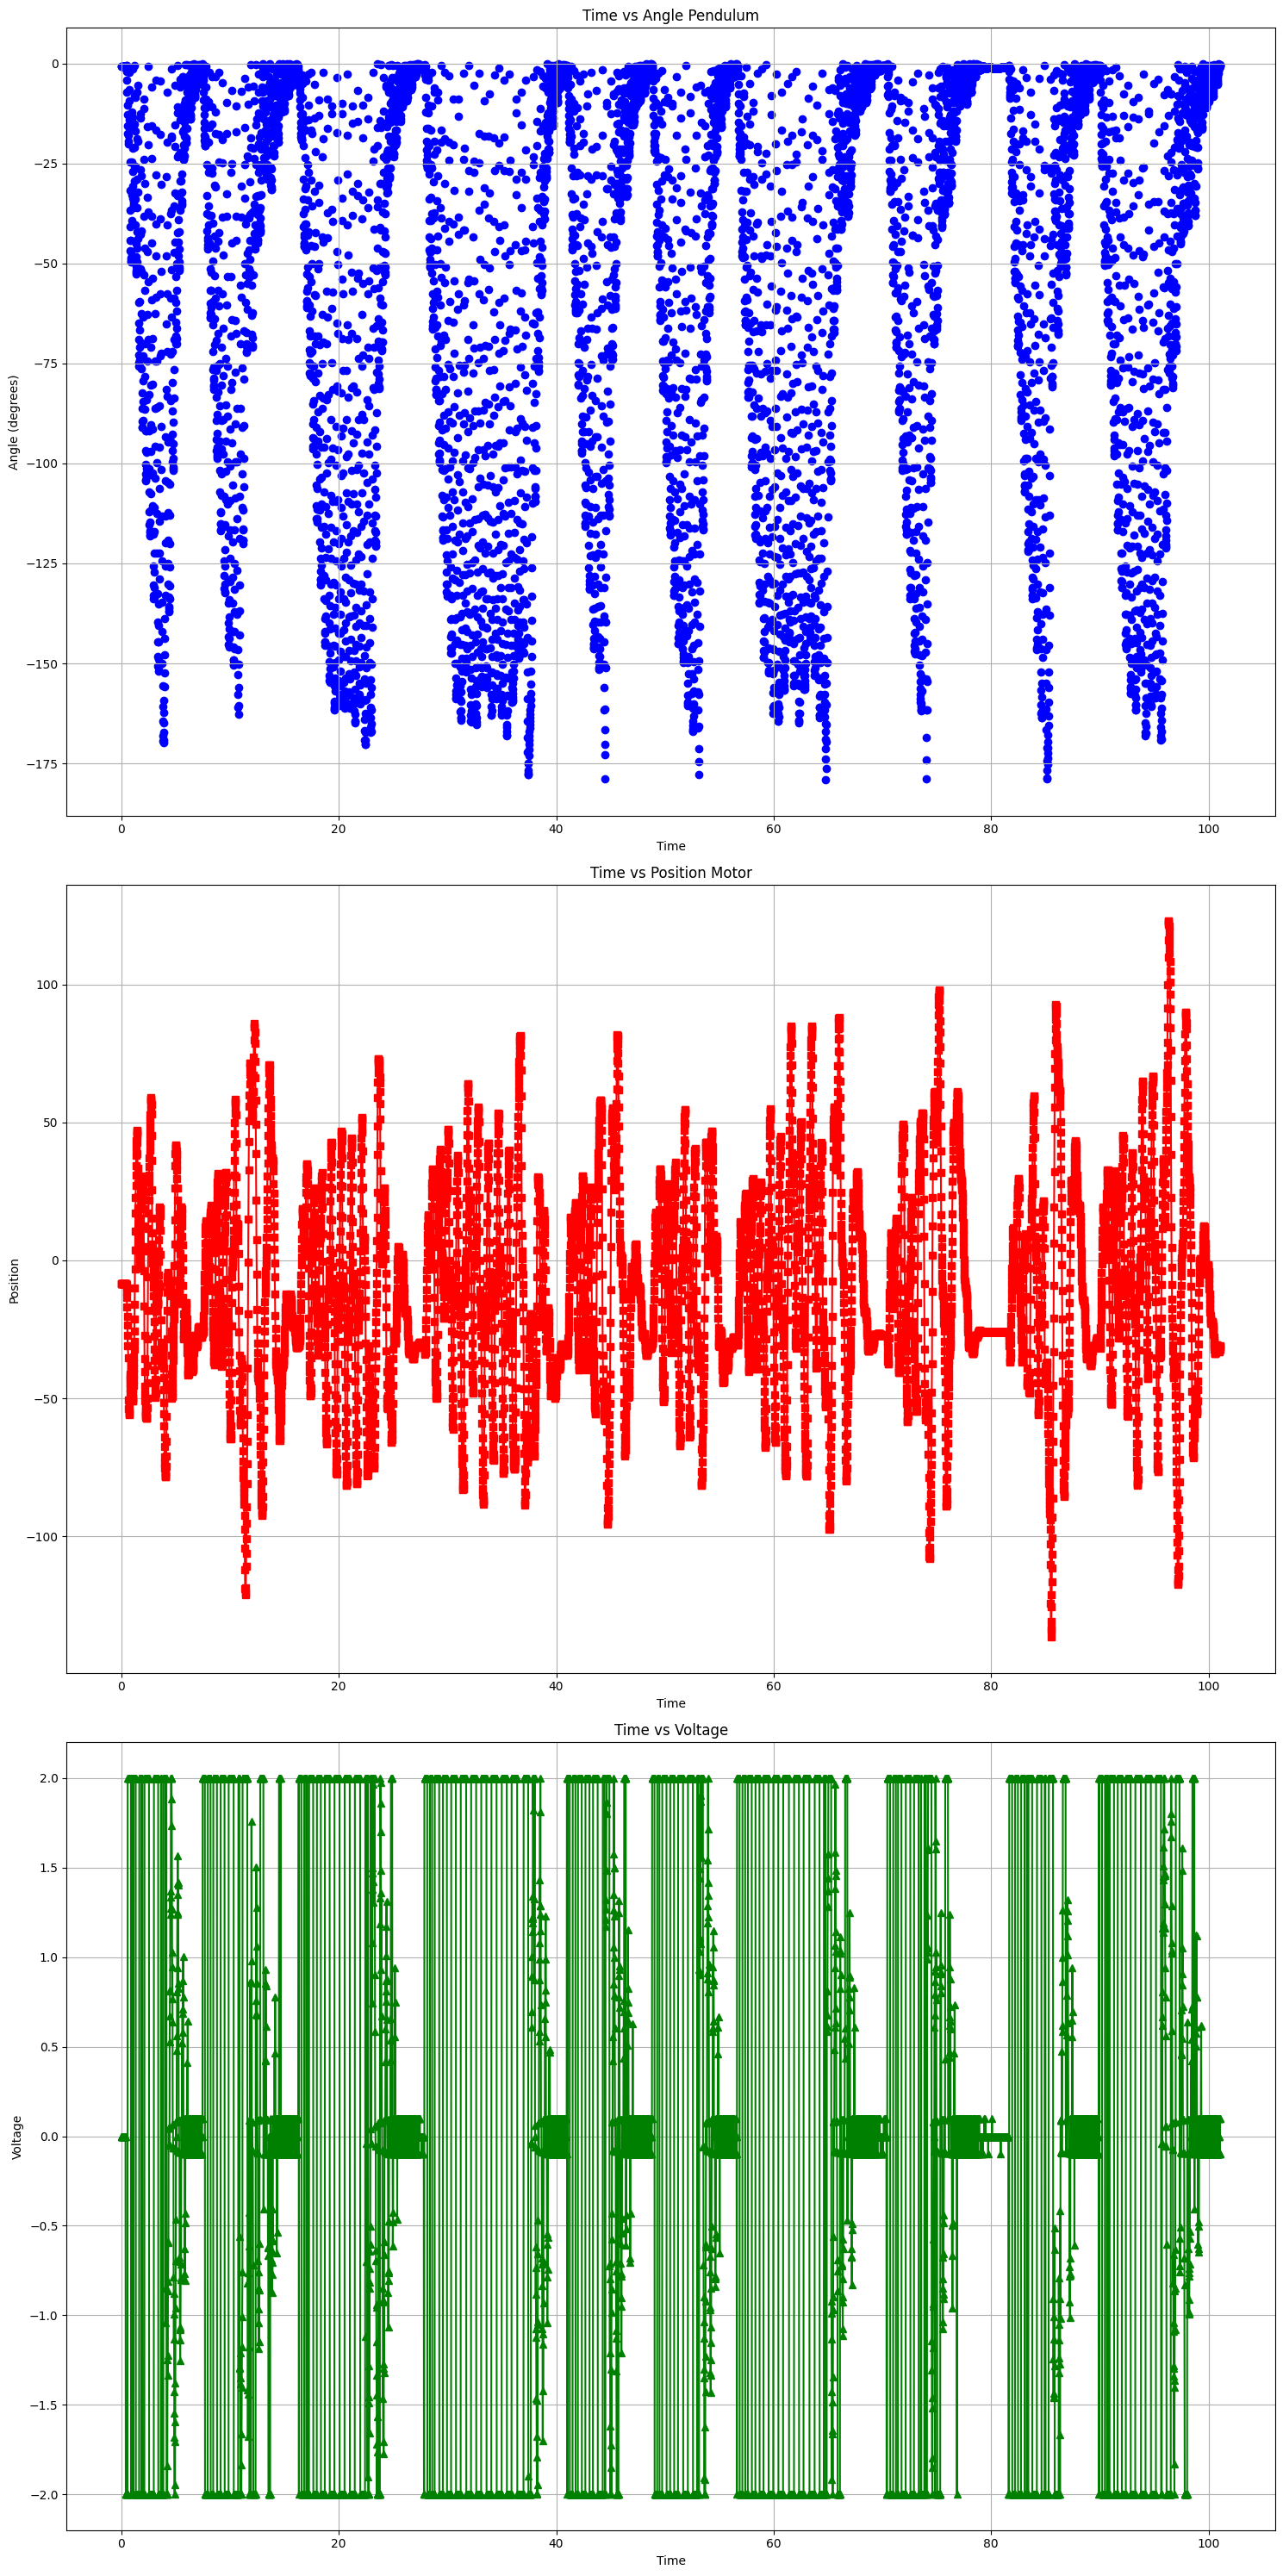

In [40]:
processed_df1 = pd.read_csv("processed_qube_data_20250329_111906.csv")
plot_p_d(processed_df1)

In [50]:
import pandas as pd
import numpy as np
import sys
import os
import io

def analyze_timestamps(data_string=None, filename=None):
    """
    Analyze timestamps from a CSV or space-delimited data
    
    Parameters:
    data_string (str): Raw data as a string (optional)
    filename (str): The path to the file containing timestamp data (optional)
    
    Returns:
    dict: A dictionary of statistics about the time differences
    """
    try:
        # Check if we're working with a string or a file
        if data_string:
            # Process the raw string data
            print("Processing data from string input")
            
            # Split the data into lines
            lines = data_string.strip().split('\n')
            
            # Get the header line and data lines
            header_line = lines[0]
            data_lines = lines[1:]
            
            # Parse the header
            headers = header_line.split()
            
            # Create a DataFrame from the data
            data_rows = []
            for line in data_lines:
                values = line.split()
                if len(values) == len(headers):
                    data_rows.append(values)
                else:
                    print(f"Warning: Skipping misaligned row: {line}")
            
            df = pd.DataFrame(data_rows, columns=headers)
            
        elif filename:
            # Read from file
            print(f"Reading file: {filename}")
            
            try:
                # First try standard CSV parsing
                df = pd.read_csv(filename)
            except:
                # If that fails, try space-delimited parsing
                df = pd.read_csv(filename, delim_whitespace=True)
        else:
            raise ValueError("Either data_string or filename must be provided")
        
        # Display basic information
        print(f"DataFrame columns: {df.columns.tolist()}")
        print(f"Number of rows: {len(df)}")
        
        # Look for time column
        time_column = "Time(s)"
        
        # If the exact column name doesn't exist, try to find a similar one
        if time_column not in df.columns:
            possible_time_columns = [col for col in df.columns if 
                                    'time' in col.lower() or 
                                    'timestamp' in col.lower()]
            
            if possible_time_columns:
                time_column = possible_time_columns[0]
                print(f'Using "{time_column}" as the time column instead of "Time(s)"')
            else:
                raise ValueError('No time-related column found in the data')
        
        # Extract time data and ensure it's numeric
        time_data = pd.to_numeric(df[time_column], errors='coerce').dropna()
        
        print(f"Number of valid time entries: {len(time_data)}")
        print(f"First few time values: {time_data.head().tolist()}")
        
        # Calculate differences between consecutive timestamps
        time_diffs = np.diff(time_data)
        
        print(f"First few time differences: {time_diffs[:5].tolist()}")
        
        # Calculate statistics
        mean_diff = np.mean(time_diffs)
        median_diff = np.median(time_diffs)
        variance = np.var(time_diffs)
        std_dev = np.std(time_diffs)
        min_diff = np.min(time_diffs)
        max_diff = np.max(time_diffs)
        
        # Return results
        return {
            'total_time_entries': len(time_data),
            'mean_difference': mean_diff,
            'median_difference': median_diff,
            'variance': variance,
            'standard_deviation': std_dev,
            'min_difference': min_diff,
            'max_difference': max_diff,
            'time_column': time_column
        }
    
    except Exception as e:
        print(f"Error analyzing timestamps: {str(e)}")
        raise

if __name__ == "__main__":
    # Check if we should use the example data
    filename = [
        "qube_data_20250329_111906.csv",
        "qube_data_20250329_132333.csv",
        "qube_data_20250329_132635.csv",
        "qube_data_20250329_145238.csv"
    ]
    
    for i in range(0, 4):
        # Check if file exists when using file input
        if filename[i] and not os.path.exists(filename[i]):
            print(f"Error: File '{filename[i]}' not found.")
            sys.exit(1)
        
        try:
    
            results = analyze_timestamps(filename=filename[i])
            
            # Print results
            print("\n===== TIMESTAMP ANALYSIS RESULTS =====")
            print(f"Time column used: {results['time_column']}")
            print(f"Number of time entries: {results['total_time_entries']}")
            print(f"Mean time difference: {results['mean_difference']:.6f} seconds")
            print(f"Median time difference: {results['median_difference']:.6f} seconds")
            print(f"Variance of time differences: {results['variance']:.6f}")
            print(f"Standard deviation: {results['standard_deviation']:.6f}")
            print(f"Minimum time difference: {results['min_difference']:.6f} seconds")
            print(f"Maximum time difference: {results['max_difference']:.6f} seconds")
            print("=======================================")
        except Exception as e:
            print(f"Analysis failed: {str(e)}")
            sys.exit(1)

Reading file: qube_data_20250329_111906.csv
DataFrame columns: ['Time(s)', 'Motor_Angle(deg)', 'Motor_Angle(rad)', 'Pendulum_Angle(deg)', 'Pendulum_Angle(rad)', 'Pendulum_Angle_From_Upright(deg)', 'Motor_Velocity(rad/s)', 'Pendulum_Velocity(rad/s)', 'Motor_Voltage(V)', 'Controller_Mode', 'Motor_RPM']
Number of rows: 7062
Number of valid time entries: 7062
First few time values: [0.018, 0.036, 0.052, 0.066, 0.08]
First few time differences: [0.018, 0.016, 0.014000000000000005, 0.013999999999999999, 0.019000000000000003]

===== TIMESTAMP ANALYSIS RESULTS =====
Time column used: Time(s)
Number of time entries: 7062
Mean time difference: 0.014312 seconds
Median time difference: 0.014000 seconds
Variance of time differences: 0.000005
Standard deviation: 0.002204
Minimum time difference: 0.011000 seconds
Maximum time difference: 0.069000 seconds
Reading file: qube_data_20250329_132333.csv
DataFrame columns: ['Time(s)', 'Motor_Angle(deg)', 'Motor_Angle(rad)', 'Pendulum_Angle(deg)', 'Pendulum_